In [2]:
import pandas as pd
titanic=pd.read_csv("../data/titanic.csv")
df=titanic.head()

In [3]:
df.sex

0    female
1      male
2    female
3      male
4    female
Name: sex, dtype: object

In [4]:
df.sex=='female'

0     True
1    False
2     True
3    False
4     True
Name: sex, dtype: bool

In [7]:
# get whole row
df[df.sex=='female']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [9]:
df.survived==0

0    False
1    False
2     True
3     True
4     True
Name: survived, dtype: bool

In [8]:
df[df.survived==0]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


# Filtering With Comparison Operators

In [13]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   name       1309 non-null   object
 3   sex        1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
dtypes: int64(4), object(10)
memory usage: 143.3+ KB


In [10]:
# age is object string so we use "" operator
titanic.age=="18"

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: age, Length: 1309, dtype: bool

In [15]:
titanic[titanic.age=="18"].head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18,1,0,PC 17757,227.525,C62 C64,C,4,?,"New York, NY"
198,1,1,"Marvin, Mrs. Daniel Warner (Mary Graham Carmic...",female,18,1,0,113773,53.1,D30,S,10,?,"New York, NY"
228,1,0,"Penasco y Castellana, Mr. Victor de Satode",male,18,1,0,PC 17758,108.9,C65,C,?,?,"Madrid, Spain"
250,1,1,"Ryerson, Miss. Emily Borie",female,18,2,2,PC 17608,262.375,B57 B59 B63 B66,C,4,?,"Haverford, PA / Cooperstown, NY"
270,1,1,"Smith, Mrs. Lucien Philip (Mary Eloise Hughes)",female,18,1,0,13695,60,C31,S,6,?,"Huntington, WV"


In [16]:
# find all the rows in titanic where class is 2 or 3
titanic.pclass!=1

0       False
1       False
2       False
3       False
4       False
        ...  
1304     True
1305     True
1306     True
1307     True
1308     True
Name: pclass, Length: 1309, dtype: bool

In [18]:
titanic[titanic.pclass!=1].pclass.value_counts()

3    709
2    277
Name: pclass, dtype: int64

<Axes: >

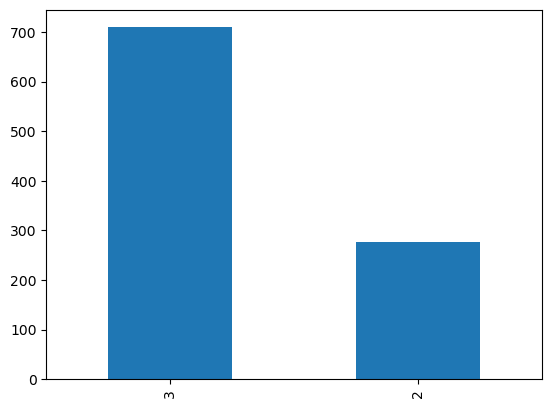

In [19]:
titanic[titanic.pclass!=1].pclass.value_counts().plot(kind="bar")

In [21]:
# find houses greater than 5 million dollars
houses=pd.read_csv("../data/kc_house_data.csv")
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
houses["price"]>5000000

0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Name: price, Length: 21613, dtype: bool

In [23]:
houses[houses["price"]>5000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730


In [24]:
# find the house between 5 to 7 bedrooms
houses["bedrooms"].between(5,7)

0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Name: bedrooms, Length: 21613, dtype: bool

In [25]:
houses[houses["bedrooms"].between(5,7)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14,1175000570,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,...,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850
22,7137970340,20140703T000000,285000.0,5,2.50,2270,6300,2.0,0,0,...,8,2270,0,1995,0,98092,47.3266,-122.169,2240,7005
42,7203220400,20140707T000000,861990.0,5,2.75,3595,5639,2.0,0,0,...,9,3595,0,2014,0,98053,47.6848,-122.016,3625,5639
51,7231300125,20150217T000000,345000.0,5,2.50,3150,9134,1.0,0,0,...,8,1640,1510,1966,0,98056,47.4934,-122.189,1990,9133
54,4217401195,20150303T000000,920000.0,5,2.25,2730,6000,1.5,0,0,...,8,2130,600,1927,0,98105,47.6571,-122.281,2730,6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21564,7168100015,20141009T000000,579950.0,5,2.75,3080,5752,2.0,0,0,...,9,3080,0,2014,0,98059,47.4922,-122.153,3000,4650
21576,9253900271,20150107T000000,3567000.0,5,4.50,4850,10584,2.0,1,4,...,10,3540,1310,2007,0,98008,47.5943,-122.110,3470,18270
21593,8672200110,20150317T000000,1088000.0,5,3.75,4170,8142,2.0,0,2,...,10,4170,0,2006,0,98056,47.5354,-122.181,3030,7980
21596,7502800100,20140813T000000,679950.0,5,2.75,3600,9437,2.0,0,0,...,9,3600,0,2014,0,98059,47.4822,-122.131,3550,9421


In [27]:
houses[houses["bedrooms"].between(5,7)].bedrooms.value_counts()

5    1601
6     272
7      38
Name: bedrooms, dtype: int64

In [ ]:
# find the grade of houses between 11 & 13

In [29]:
houses[houses["grade"].between(11,13)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
70,1525059190,20140912T000000,1040000.0,5,3.25,4770,50094,1.0,0,0,...,11,3070,1700,1973,0,98005,47.6525,-122.160,3530,38917
153,7855801670,20150401T000000,2250000.0,4,3.25,5180,19850,2.0,0,3,...,12,3540,1640,2006,0,98006,47.5620,-122.162,3160,9750
269,7960900060,20150504T000000,2900000.0,4,3.25,5050,20100,1.5,0,2,...,11,4750,300,1982,2008,98004,47.6312,-122.223,3890,20060
270,4054500390,20141007T000000,1365000.0,4,4.75,5310,57346,2.0,0,0,...,11,5310,0,1989,0,98077,47.7285,-122.042,4180,47443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21532,324069112,20140617T000000,1325000.0,4,4.00,4420,16526,2.0,0,0,...,11,4420,0,2013,0,98075,47.5914,-122.027,3510,50447
21548,8835770330,20140819T000000,1057000.0,2,1.50,2370,184231,2.0,0,0,...,11,2370,0,2005,0,98045,47.4543,-121.778,3860,151081
21551,1561750040,20141224T000000,1375000.0,5,4.50,4350,13405,2.0,0,0,...,11,4350,0,2014,0,98074,47.6018,-122.060,3990,7208
21590,7430200100,20140514T000000,1222500.0,4,3.50,4910,9444,1.5,0,0,...,11,3110,1800,2007,0,98074,47.6502,-122.066,4560,11063


In [30]:
houses[houses["grade"].between(11,13)].grade.value_counts()

11    399
12     90
13     13
Name: grade, dtype: int64

# isin() method

In [33]:
netflix=pd.read_csv("../data/netflix_titles.csv",sep="|",index_col=3)
netflix

,Unnamed: 0,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
title,,,,,,,,,,,,
Dick Johnson Is Dead,0,s1,Movie,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
Blood & Water,1,s2,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
Ganglands,2,s3,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
Jailbirds New Orleans,3,s4,TV Show,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
Kota Factory,4,s5,TV Show,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac,8802,s8803,Movie,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
Zombie Dumb,8803,s8804,TV Show,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
Zombieland,8804,s8805,Movie,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [38]:
# find different show or movies in japan, south korea in india
countries=["India","Japan","South Korea"]
netflix["country"].isin(countries)

title
Dick Johnson Is Dead     False
Blood & Water            False
Ganglands                False
Jailbirds New Orleans    False
Kota Factory              True
                         ...  
Zodiac                   False
Zombie Dumb              False
Zombieland               False
Zoom                     False
Zubaan                    True
Name: country, Length: 8807, dtype: bool

In [39]:
netflix[netflix["country"].isin(countries)]

,Unnamed: 0,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
title,,,,,,,,,,,,
Kota Factory,4,s5,TV Show,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
Jeans,24,s25,Movie,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
Chhota Bheem,39,s40,TV Show,NaN,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"September 16, 2021",2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ..."
Dharmakshetra,50,s51,TV Show,NaN,"Kashmira Irani, Chandan Anand, Dinesh Mehta, A...",India,"September 15, 2021",2014,TV-PG,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi &...","After the ancient Great War, the god Chitragup..."
InuYasha the Movie 2: The Castle Beyond the Looking Glass,51,s52,Movie,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Mieko Harada...",Japan,"September 15, 2021",2002,TV-14,99 min,"Action & Adventure, Anime Features, Internatio...","With their biggest foe seemingly defeated, Inu..."
...,...,...,...,...,...,...,...,...,...,...,...,...
Yanda Kartavya Aahe,8773,s8774,Movie,Kedar Shinde,"Ankush Choudhary, Smita Shewale, Mohan Joshi, ...",India,"January 1, 2018",2006,TV-PG,151 min,"Comedies, Dramas, International Movies",Thanks to an arranged marriage that was design...
Yeh Meri Family,8775,s8776,TV Show,NaN,"Vishesh Bansal, Mona Singh, Akarsh Khurana, Ah...",India,"August 31, 2018",2018,TV-PG,1 Season,"International TV Shows, TV Comedies","In the summer of 1998, middle child Harshu bal..."
Zed Plus,8798,s8799,Movie,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...


In [52]:
netflix[netflix["country"].isin(countries)]['country'].value_counts()

India          972
Japan          245
South Korea    199
Name: country, dtype: int64

In [56]:
# Find TVMA or R rated shows
mature=netflix["rating"].isin(["TV-MA","R"])

In [58]:
netflix[mature]

,Unnamed: 0,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
title,,,,,,,,,,,,
Blood & Water,1,s2,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
Ganglands,2,s3,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
Jailbirds New Orleans,3,s4,TV Show,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
Kota Factory,4,s5,TV Show,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
Midnight Mass,5,s6,TV Show,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
Young Adult,8791,s8792,Movie,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,"November 20, 2019",2011,R,94 min,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...
Zed Plus,8798,s8799,Movie,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
Zinzana,8801,s8802,Movie,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
